In [5]:
!pip install ultralytics
import ultralytics
ultralytics.checks()
from ultralytics import YOLO
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image
from tensorflow.keras.models import load_model
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.preprocessing import image


Ultralytics YOLOv8.0.229 🚀 Python-3.10.12 torch-2.1.0+cu121 CPU (Intel Xeon 2.20GHz)
Setup complete ✅ (2 CPUs, 12.7 GB RAM, 26.3/107.7 GB disk)


In [1]:
# Mount Google Drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [6]:
model_yolo = YOLO('/content/drive/MyDrive/HeadDetectionStage/train7/weights/best.pt')
model_resnet = load_model('/content/drive/MyDrive/resnet_classification1/best_val.h5')

In [7]:
source_image = '/content/drive/MyDrive/Test/Group/51.png'
image = cv2.imread(source_image)

In [8]:
results = model_yolo(source_image)  # results list

# View results
for r in results:
    print(r.boxes)  # print the Boxes object containing the detection bounding boxes

# print(results)



image 1/1 /content/drive/MyDrive/Test/Group/51.png: 608x640 3 heads, 1301.1ms
Speed: 28.7ms preprocess, 1301.1ms inference, 31.8ms postprocess per image at shape (1, 3, 608, 640)
ultralytics.engine.results.Boxes object with attributes:

cls: tensor([0., 0., 0.])
conf: tensor([0.6226, 0.5725, 0.2552])
data: tensor([[1.4244e+02, 2.8063e+02, 1.9511e+02, 3.3589e+02, 6.2264e-01, 0.0000e+00],
        [1.9696e+02, 1.3518e+02, 2.2976e+02, 1.7201e+02, 5.7247e-01, 0.0000e+00],
        [2.6487e+02, 1.4682e+02, 3.0239e+02, 1.7703e+02, 2.5520e-01, 0.0000e+00]])
id: None
is_track: False
orig_shape: (557, 617)
shape: torch.Size([3, 6])
xywh: tensor([[168.7728, 308.2582,  52.6688,  55.2557],
        [213.3587, 153.5944,  32.7966,  36.8297],
        [283.6324, 161.9240,  37.5202,  30.2104]])
xywhn: tensor([[0.2735, 0.5534, 0.0854, 0.0992],
        [0.3458, 0.2758, 0.0532, 0.0661],
        [0.4597, 0.2907, 0.0608, 0.0542]])
xyxy: tensor([[142.4384, 280.6303, 195.1072, 335.8860],
        [196.9603, 135.


image 1/1 /content/drive/MyDrive/Test/Group/51.png: 608x640 3 heads, 869.1ms
Speed: 4.4ms preprocess, 869.1ms inference, 1.4ms postprocess per image at shape (1, 3, 608, 640)


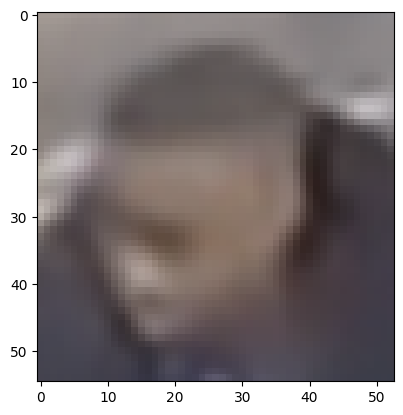

1/1 [==============================] - 2s 2s/step
Dự đoán cho khu vực [142, 280, 195, 335]:
hat: 0.9968
male: 0.7819


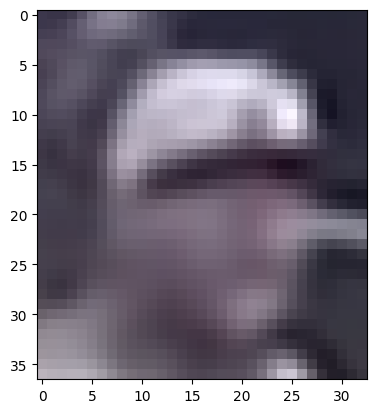

1/1 [==============================] - 0s 198ms/step
Dự đoán cho khu vực [196, 135, 229, 172]:
hat: 0.9813
male: 0.9588


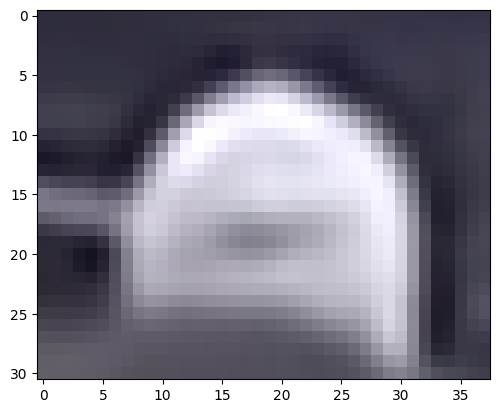

1/1 [==============================] - 0s 194ms/step
Dự đoán cho khu vực [264, 146, 302, 177]:
female: 0.8547
hat: 0.8123


In [9]:
def preprocess_image(img, size=(224, 224)):
    img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
    img = cv2.resize(img, size)
    img = np.expand_dims(img, axis=0)
    img = preprocess_input(img)
    return img

def crop_and_classify(image, bbox, model):
    x_min, y_min, x_max, y_max = bbox
    cropped_image = image[y_min:y_max, x_min:x_max]
    plt.imshow(cv2.cvtColor(cropped_image, cv2.COLOR_BGR2RGB))
    plt.show()
    input_data = preprocess_image(cropped_image)
    predictions = model.predict(input_data)
    return predictions

results = model_yolo(source_image)
# danh sách các nhãn
labels = ['beard', 'earrings', 'female', 'glass', 'hat', 'male']

# Process results
for r in results:
    for bbox_tensor in r.boxes.xyxy:
      bbox = bbox_tensor.numpy().astype(int)
      predictions = crop_and_classify(cv2.imread(source_image), bbox, model_resnet)
      print(f"Dự đoán cho khu vực [{bbox[0]}, {bbox[1]}, {bbox[2]}, {bbox[3]}]:")
      for label, prob in zip(labels, predictions[0]):
            if prob > 0.5:  # Kiểm tra ngưỡng
                print(f"{label}: {prob:.4f}")


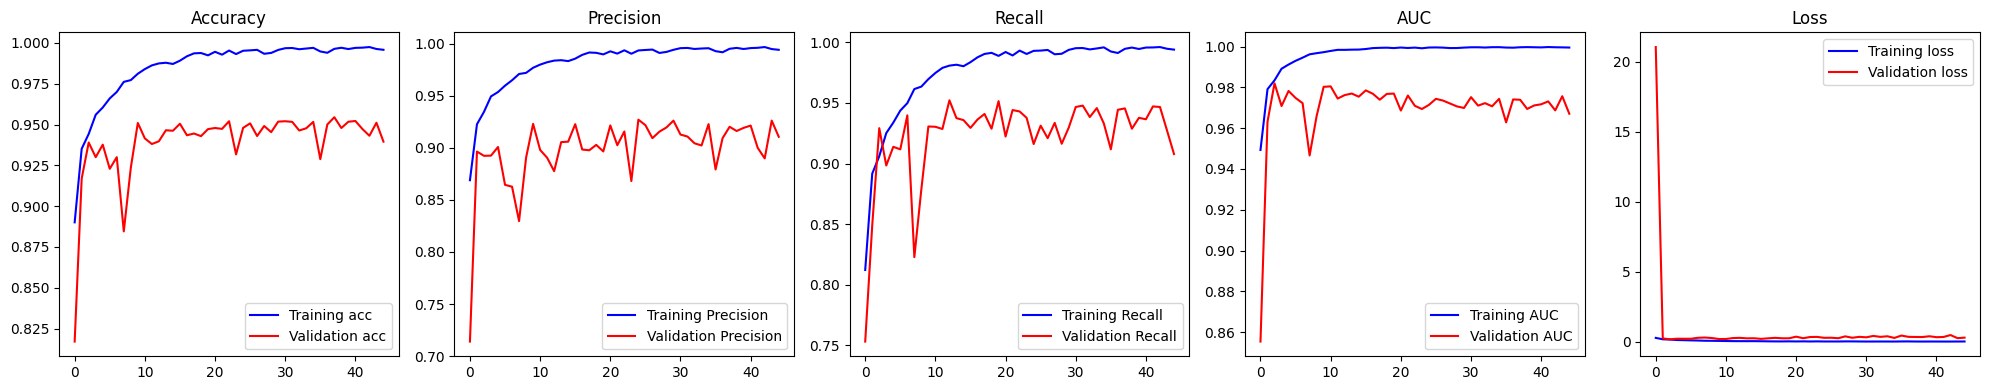

In [14]:
import pandas as pd
import matplotlib.pyplot as plt

# Đọc dữ liệu từ tệp CSV vào một DataFrame
data = pd.read_csv('/content/drive/MyDrive/resnet_classification/training_logg_modified.csv')

# Lấy dữ liệu từ DataFrame
epochs = data['epoch']
acc = data['accuracy']
val_acc = data['val_accuracy']
precision = data['precision']
val_precision = data['val_precision']
recall = data['recall']
val_recall = data['val_recall']
auc = data['auc']
val_auc = data['val_auc']
loss = data['loss']
val_loss = data['val_loss']

# Tạo một hàng có 5 đồ thị
plt.figure(figsize=(20, 4))

# Đồ thị Accuracy
plt.subplot(1, 5, 1)
plt.plot(epochs, acc, 'b', label='Training acc')
plt.plot(epochs, val_acc, 'r', label='Validation acc')
plt.title('Accuracy')
plt.legend()


# Đồ thị Precision
plt.subplot(1, 5, 2)
plt.plot(epochs, precision, 'b', label='Training Precision')
plt.plot(epochs, val_precision, 'r', label='Validation Precision')
plt.title('Precision')
plt.legend()

# Đồ thị Recall
plt.subplot(1, 5, 3)
plt.plot(epochs, recall, 'b', label='Training Recall')
plt.plot(epochs, val_recall, 'r', label='Validation Recall')
plt.title('Recall')
plt.legend()

# Đồ thị AUC
plt.subplot(1, 5, 4)
plt.plot(epochs, auc, 'b', label='Training AUC')
plt.plot(epochs, val_auc, 'r', label='Validation AUC')
plt.title('AUC')
plt.legend()

# Đồ thị Loss
plt.subplot(1, 5, 5)
plt.plot(epochs, loss, 'b', label='Training loss')
plt.plot(epochs, val_loss, 'r', label='Validation loss')
plt.title('Loss')
plt.legend()

plt.tight_layout()
plt.show()
